In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv


# The World Health Organization (WHO) reports that stroke is the second most common cause of death worldwide, accounting for around 11% of all deaths

![](https://images.hindustantimes.com/img/2022/10/28/550x309/silent_stroke-Signs_1666960181758_1666960181961_1666960181961.jpg)

> A stroke occurs when the blood supply to the brain is interrupted, leading to damage or death of brain cells. The risk factors for stroke include high blood pressure, smoking, diabetes, obesity, family history of stroke, and previous history of stroke or heart disease.
> 
> Stroke prediction models use a combination of risk factors to estimate an individual's likelihood of having a stroke within a certain time frame. These models can be helpful in guiding prevention and treatment strategies, such as lifestyle modifications, medication management, and close monitoring for early signs of stroke.

### Import lib raries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [4]:
# read data 
df = pd.read_csv("/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv")

In [6]:
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


**Attribute Information**
1. id: unique identifier
2. gender: "Male", "Female" or "Other"
3. age: age of the patient
4. hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5. heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6. ever_married: "No" or "Yes"
7. work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8. Residence_type: "Rural" or "Urban"
9. avg_glucose_level: average glucose level in blood
10. bmi: body mass index
11. smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12. stroke: 1 if the patient had a stroke or 0 if not

## 1. Exploratory Data Analysis & Feature Emngineering

In [8]:
# checking no. of rows and columns
df.shape

(5110, 12)

##### REVOME UNNECESSARY COLUMNS IF ANY

In [9]:
# deleting the ID column
df.drop(columns='id',axis=1,inplace=True)

In [10]:
## CHECKING DUPLICATE VALUES
df.duplicated().sum()

0

*****there are no duplicate values*****

#### Handling Missing Values

In [11]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

***The dataset contains some missing values in bmi column.Let's try to remove or fill that first before moving on.***

In [12]:
#WE ARE REPLACING THE NULL VALUES WITH MEAN OF THAT FEATURE.
df['bmi'].fillna(df['bmi'].mean(),inplace=True)

In [13]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [14]:
# no of values in dependent column
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

#### plotting a histogram on target column

array([[<AxesSubplot:title={'center':'stroke'}>]], dtype=object)

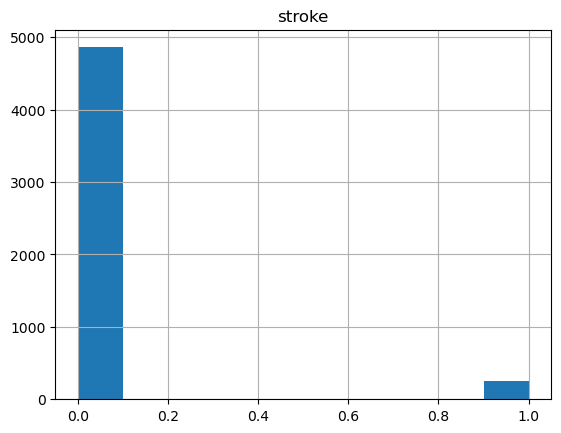

In [15]:
df.hist(column = 'stroke')

In [16]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

**In gender there is only one other gender so we can remove that row**

In [17]:
df = df.drop(df[df['gender'] == 'Other'].index)

#### Checking the correlation 

In [18]:
df.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276367,0.263777,0.238323,0.325858,0.245239
hypertension,0.276367,1.000000,0.108292,0.174540,0.160147,0.127891
heart_disease,0.263777,0.108292,1.000000,0.161907,0.038862,0.134905
avg_glucose_level,0.238323,0.174540,0.161907,1.000000,0.168910,0.131991
bmi,0.325858,0.160147,0.038862,0.168910,1.000000,0.038912
stroke,0.245239,0.127891,0.134905,0.131991,0.038912,1.000000


<AxesSubplot:>

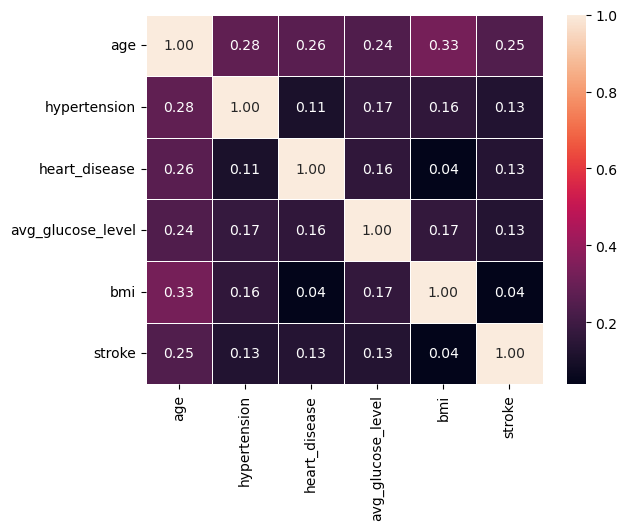

In [19]:
sns.heatmap(df.corr(),annot=True,linewidth=0.5,fmt='0.2f')

#### Gender and stroke

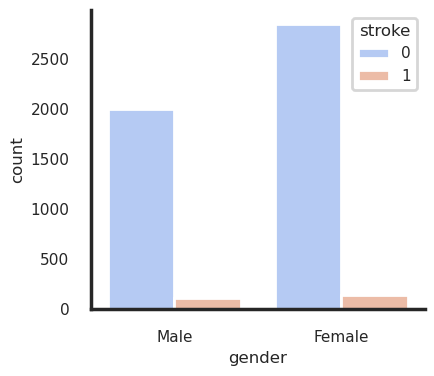

In [20]:
fig = plt.figure(figsize=(9,6))
gs = fig.add_gridspec(3,4)
sns.set_style("white")
sns.set_context("poster", font_scale = 0.5)

ax_gender_stroke = fig.add_subplot(gs[:2,:2])
sns.countplot(x='gender', hue='stroke', data=df, ax=ax_gender_stroke, palette='coolwarm')
sns.despine()

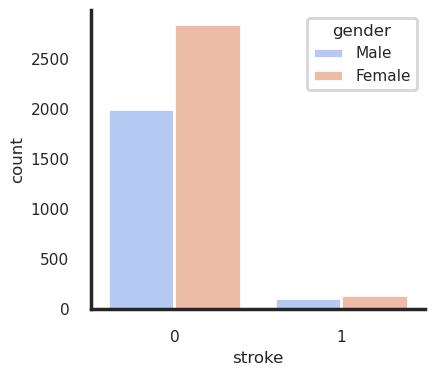

In [21]:
fig = plt.figure(figsize=(9,6))
gs = fig.add_gridspec(3,4)
sns.set_style("white")
sns.set_context("poster", font_scale = 0.5)

ax_gender_stroke = fig.add_subplot(gs[:2,2:4], sharey=ax_gender_stroke)
sns.countplot(x='stroke', hue='gender', data=df, ax=ax_gender_stroke, palette='coolwarm')
sns.despine()
plt.show()

#### Heart Disease & Stroke

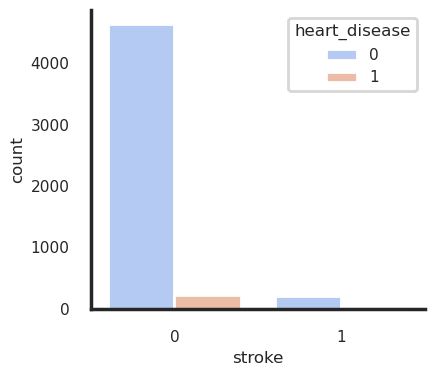

In [22]:
fig = plt.figure(figsize=(9,6))
gs = fig.add_gridspec(3,4)
sns.set_style("white")
sns.set_context("poster", font_scale = 0.5)

ax_gender_stroke = fig.add_subplot(gs[:2,2:4], sharey=ax_gender_stroke)
sns.countplot(x='stroke', hue='heart_disease', data=df, ax=ax_gender_stroke, palette='coolwarm')
sns.despine()
plt.show()

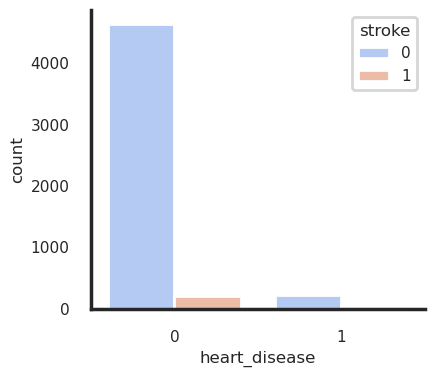

In [23]:
fig = plt.figure(figsize=(9,6))
gs = fig.add_gridspec(3,4)
sns.set_style("white")
sns.set_context("poster", font_scale = 0.5)

ax_gender_stroke = fig.add_subplot(gs[:2,:2])
sns.countplot(x='heart_disease', hue='stroke', data=df, ax=ax_gender_stroke, palette='coolwarm')
sns.despine()

#### Hypertension & Stroke

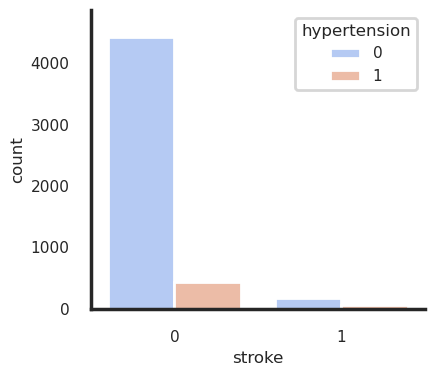

In [24]:
fig = plt.figure(figsize=(9,6))
gs = fig.add_gridspec(3,4)
sns.set_style("white")
sns.set_context("poster", font_scale = 0.5)

ax_gender_stroke = fig.add_subplot(gs[:2,2:4], sharey=ax_gender_stroke)
sns.countplot(x='stroke', hue='hypertension', data=df, ax=ax_gender_stroke, palette='coolwarm')
sns.despine()
plt.show()

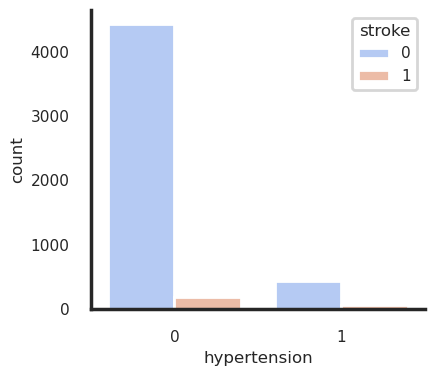

In [25]:
fig = plt.figure(figsize=(9,6))
gs = fig.add_gridspec(3,4)
sns.set_style("white")
sns.set_context("poster", font_scale = 0.5)

ax_gender_stroke = fig.add_subplot(gs[:2,:2])
sns.countplot(x='hypertension', hue='stroke', data=df, ax=ax_gender_stroke, palette='coolwarm')
sns.despine()


**Insights drawn from the above plot with respect to the Stroke Data**
1. Both the Genders have arround 5% chance.
2. People with history of Hypertension and Heart Disease have shown an increased in percentage of Stroke with around 12.5% and 16.5%   respectively 

In [26]:
df.head(1)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1


#### pandas profiling

In [5]:
# Generate the Profiling Report
import pandas_profiling as pp
pandasprofile = pp.ProfileReport(df,
                           title="Brain Stroke analysis and Prediction Dataset",
                           html={"style": {"full_width": True}}
)

In [6]:
pandasprofile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
# download pandas profiling report
pandasprofile.to_file('report.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
pandasprofile.to_widgets()

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
# download widget report
pandasprofile.to_file('widget_report.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [27]:
# Splitting into features and value to be predicted
X = df.drop(columns=['stroke'])
y = df['stroke']

In [28]:
# Spliting the Data into Train and Test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

In [29]:
X_train.head(1)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
4544,Female,30.0,0,0,Yes,Private,Urban,116.98,26.0,never smoked


In [30]:
X_train.columns.get_loc('smoking_status') 

9

In [31]:
X_train['smoking_status'].value_counts()

never smoked       1319
Unknown            1081
formerly smoked     617
smokes              559
Name: smoking_status, dtype: int64

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import set_config

**One Hot Encoding Transformer**

In [33]:
trf1 = ColumnTransformer([
    ('ohe_cat',OneHotEncoder(sparse=False,handle_unknown='ignore'),[0,4,5,6,9])
],remainder='passthrough')

**Scaling Transformer**

In [34]:
trf2 = ColumnTransformer([
    ('scale',MinMaxScaler(),slice(0,19))
],remainder='passthrough')

In [35]:
# train the model
trf3 = RandomForestClassifier(random_state=42)

## Creating Pipeline

In [36]:
# Define the pipeline
pipe = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3)
])

## GridSearch using Pipeline

In [37]:
# Define the hyperparameters to tune

param_grid = { 
    'trf3__n_estimators': [200, 500],
    'trf3__max_features': ['auto', 'sqrt', 'log2'],
    'trf3__max_depth' : [4,5,6,7,8],
    'trf3__criterion' :['gini', 'entropy']
}
# Perform grid search cv with cross-validation
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('trf1',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe_cat',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         [0, 4,
                                                                          5, 6,
                                                                          9])])),
                                       ('trf2',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('scale',
                                                                         MinMaxScaler(),
        

In [38]:
grid.best_score_

0.9502238543579326

**These are the best hyper parameters for decision tree**

In [40]:
grid.best_params_

{'trf3__criterion': 'gini',
 'trf3__max_depth': 4,
 'trf3__max_features': 'auto',
 'trf3__n_estimators': 200}

In [39]:
# displaying pipline
set_config(display='diagram')
pipe

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [0, 4, 5, 6, 9])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 19, None))])),
                ('trf3', RandomForestClassifier(random_state=42))])

#### Exporting the pioe

In [54]:
import pickle
# Save model using pickle.dump() with best parameters
with open('RFmodel.pkl', 'wb') as f:
    pickle.dump(grid.best_estimator_, f)

In [56]:
mdl = pickle.load(open('RFmodel.pkl','rb'))

In [57]:
# caluculation the confusion metrics
from sklearn.metrics import classification_report,accuracy_score
predictions = mdl.predict(X_test)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1462
           1       0.00      0.00      0.00        71

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.91      0.95      0.93      1533



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [58]:
# printing the accuracy 
print('Accuracy:', accuracy_score(y_test, predictions))

Accuracy: 0.9536855838225701
